<a href="https://colab.research.google.com/github/nika-va/practice/blob/main/05_transfer_learning_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Oct  1 18:44:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-01 18:44:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-01 18:44:36 (92.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-10-01 18:44:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   210MB/s    in 0.8s    

2023-10-01 18:44:41 (210 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

In [6]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [7]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
# for images, labels in train_data_10_percent.take(1):
#   print(images, labels)

In [10]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_data_10_percent, epochs=10, steps_per_epoch=(len(train_data_10_percent)))

24274472/24274472 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - 21s 87ms/step - loss: 1.8266 - accuracy: 0.4413
Epoch 2/10
24/24 [==============================] - 2s 57ms/step - loss: 1.0793 - accuracy: 0.7600
Epoch 3/10
24/24 [==============================] - 2s 74ms/step - loss: 0.7849 - accuracy: 0.8373
Epoch 4/10
24/24 [==============================] - 2s 59ms/step - loss: 0.6327 - accuracy: 0.8613
Epoch 5/10
24/24 [==============================] - 2s 59ms/step - loss: 0.5396 - accuracy: 0.8840
Epoch 6/10
24/24 [==============================] - 2s 61ms/step - loss: 0.4719 - accuracy: 0.8947
Epoch 7/10
24/24 [==============================] - 2s 58ms/step - loss: 0.4175 - accuracy: 0.9093
Epoch 8/10
24/24 [==============================] - 2s 59ms/step - loss: 0.3745 - accuracy: 0.9160
Epoch 9/10
24/24 [==============================] - 3s 77ms/step - loss: 0.3397 - accuracy: 0.9320
Epoch 10/10
24/24 [========================

In [11]:
len(train_data_10_percent)

24

In [12]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
print(f"shape after passing inputs through base modl: {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"shape after GlobalAveragePooling2D: {x.shape}")
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics='accuracy')
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning",
                                                               "10_percent_feature_extraction")])

16705208/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base modl: (None, 7, 7, 1280)
shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231001-184543
Epoch 1/5
24/24 [==============================] - 13s 229ms/step - loss: 1.8615 - accuracy: 0.4253 - val_loss: 1.3059 - val_accuracy: 0.6924
Epoch 2/5
24/24 [==============================] - 4s 146ms/step - loss: 1.0756 - accuracy: 0.7667 - val_loss: 0.8937 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - 5s 180ms/step - loss: 0.7819 - accuracy: 0.8227 - val_loss: 0.7167 - val_accuracy: 0.8421
Epoch 4/5
24/24 [==============================] - 5s 179ms/step - loss: 0.6318 - accuracy: 0.8507 - val_loss: 0.6148 - val_accuracy: 0.8618
Epoch 5/5
24/24 [==============================] - 4s 173ms/step - loss: 0.5462 - accuracy: 0.8707 - val_loss: 0.5740 - val_accuracy: 0.8536


In [13]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.5516 - accuracy: 0.8708


[0.551615834236145, 0.8708000183105469]

In [14]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_3
1 rescaling_1
2 normalization_1
3 rescaling_2
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        7         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, None, None, 3)        0         ['normalization_1

In [16]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

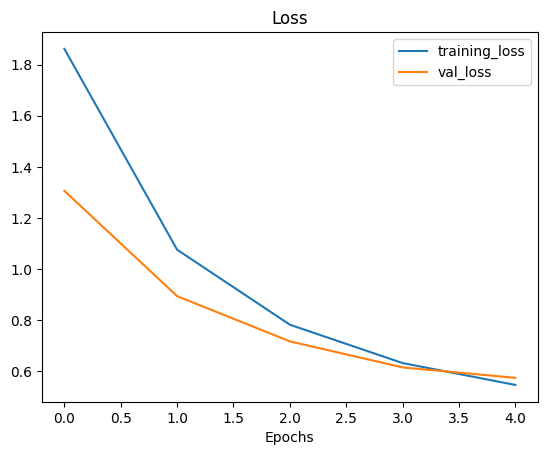

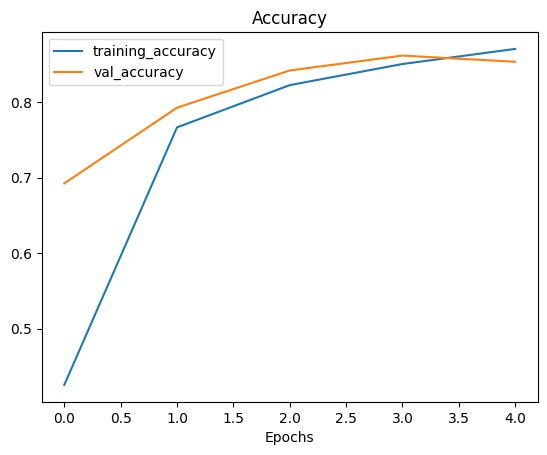

In [17]:
plot_loss_curves(history_0)

In [18]:
from keras.src.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
input_shape = (1, 4, 4 ,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'random input tensor:\n {input_tensor}\n')

tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]



<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [19]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [20]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2023-10-01 18:46:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   106MB/s    in 1.2s    

2023-10-01 18:46:26 (106 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir_1_percent = '10_food_classes_1_percent/test'

In [22]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'

In [23]:
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                          label_mode='categorical',
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1/255.)
], name ='data_augmentation')


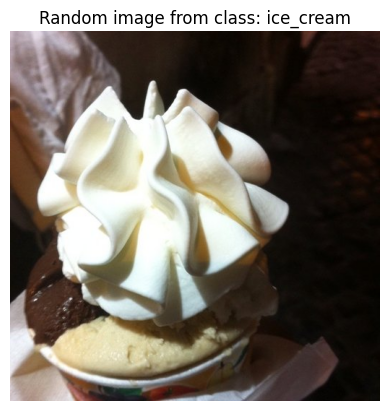

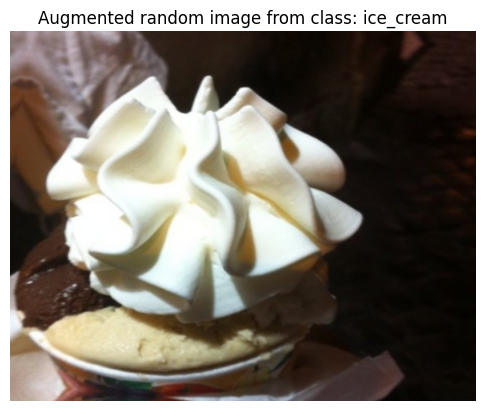

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +'/'+ random_image

img = mpimg.imread(random_image_path)
plt.title(f"Random image from class: {target_class}")
plt.imshow(img)
plt.axis('off');

augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis('off');

In [26]:
os.listdir(target_dir)

['137699.jpg',
 '2225554.jpg',
 '2188378.jpg',
 '104465.jpg',
 '1101478.jpg',
 '3019934.jpg',
 '919447.jpg']

## Model_1

In [27]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        validation_data=test_data_1_percent,
                        callbacks=[create_tensorboard_callback('transfer_learning',
                                                               '1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20231001-184631
Epoch 1/5
3/3 [==============================] - 18s 4s/step - loss: 2.3078 - accuracy: 0.1286 - val_loss: 2.1711 - val_accuracy: 0.2260
Epoch 2/5
3/3 [==============================] - 8s 3s/step - loss: 2.0898 - accuracy: 0.2571 - val_loss: 2.0458 - val_accuracy: 0.3216
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 1.8653 - accuracy: 0.4429 - val_loss: 1.9397 - val_accuracy: 0.4024
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7196 - accuracy: 0.5714 - val_loss: 1.8395 - val_accuracy: 0.4804
Epoch 5/5
3/3 [==============================] - 8s 4s/step - loss: 1.5188 - accuracy: 0.7143 - val_loss: 1.7432 - val_accuracy: 0.5384


In [28]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [29]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 71ms/step - loss: 1.7432 - accuracy: 0.5384


[1.7431968450546265, 0.5383999943733215]

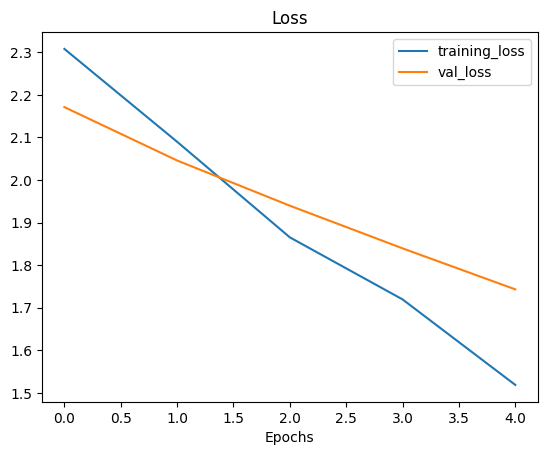

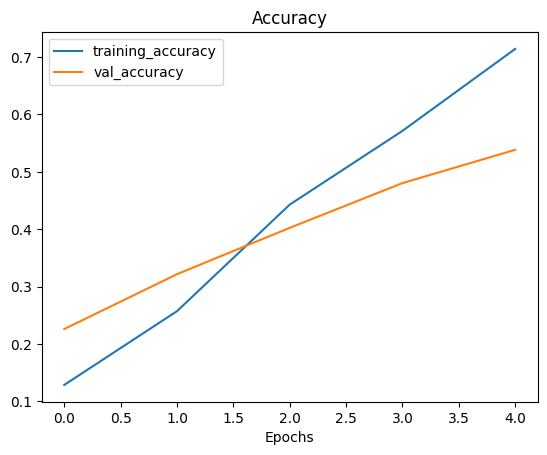

In [30]:
plot_loss_curves(history_1)

## Model_2

In [31]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-10-01 18:47:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   172MB/s    in 0.9s    

2023-10-01 18:47:33 (172 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [32]:
train_dir_10_percent = '10_food_classes_10_percent/train/'
test_dir_10_percent = '10_food_classes_10_percent/test/'

In [33]:
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                          label_mode='categorical',
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [34]:
# Layer preparation
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1/255.)
], name ='data_augmentation')

# Creating model_2
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
outputs = keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_2 = keras.Model(inputs, outputs)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
history_2 = model_2.fit(train_data_10_percent,
                        epochs=5,
                        validation_data=test_data_10_percent,
                        callbacks=[create_tensorboard_callback('transfer_learning',
                                                               '10_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231001-184741
Epoch 1/5
24/24 [==============================] - 39s 1s/step - loss: 2.0026 - accuracy: 0.3573 - val_loss: 1.4301 - val_accuracy: 0.6936
Epoch 2/5
24/24 [==============================] - 16s 666ms/step - loss: 1.3002 - accuracy: 0.7147 - val_loss: 0.9828 - val_accuracy: 0.7992
Epoch 3/5
24/24 [==============================] - 19s 809ms/step - loss: 0.9833 - accuracy: 0.7747 - val_loss: 0.7832 - val_accuracy: 0.8324
Epoch 4/5
24/24 [==============================] - 15s 624ms/step - loss: 0.8254 - accuracy: 0.8240 - val_loss: 0.6851 - val_accuracy: 0.8384
Epoch 5/5
24/24 [==============================] - 16s 664ms/step - loss: 0.7183 - accuracy: 0.8373 - val_loss: 0.6164 - val_accuracy: 0.8508


In [35]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [65]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)


In [37]:
model_2.fit(train_data_10_percent,
            epochs=5,
            validation_data=test_data_10_percent,
            callbacks=[create_tensorboard_callback('transfer_learning',
                                                   '10_percent_data_aug'),
                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231001-184928
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.6537 - accuracy: 0.8413
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 16s 611ms/step - loss: 0.6537 - accuracy: 0.8413 - val_loss: 0.5786 - val_accuracy: 0.8548
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.5884 - accuracy: 0.8520
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 574ms/step - loss: 0.5884 - accuracy: 0.8520 - val_loss: 0.5440 - val_accuracy: 0.8624
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.5479 - accuracy: 0.8720
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 557ms/step - loss: 0.5479 - accuracy: 0.8720 - val_loss: 0.5267 - val_accuracy: 0.8592
E

In [38]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 0.5516 - accuracy: 0.8708


[0.551615834236145, 0.8708000183105469]

In [39]:
a = model_2.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.4932 - accuracy: 0.8612


In [40]:
model_2.load_weights(checkpoint_path)

In [41]:
b = model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.4932 - accuracy: 0.8612


In [42]:
import numpy as np
np.isclose(np.array(a), np.array(b))

array([ True,  True])

## Model_3

In [43]:
model_2.layers

In [44]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7f99d5b66920> True
<keras.src.engine.sequential.Sequential object at 0x7f99c47d5a50> True
<keras.src.engine.functional.Functional object at 0x7f99c43e84c0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f99c4722890> True
<keras.src.layers.core.dense.Dense object at 0x7f99c43ea110> True


In [45]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_5 False
1 rescaling_5 False
2 normalization_3 False
3 rescaling_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [46]:
# Fine-tuning
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics='accuracy')


In [47]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_5 False
2 normalization_3 False
3 rescaling_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [48]:
print(len(model_2.trainable_variables))

12


In [49]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

In [51]:
fine_tune_epochs = 5 + 5

history_3 = model_2.fit(train_data_10_percent,
                        epochs=fine_tune_epochs,
                        validation_data=test_data_10_percent,
                        initial_epoch=history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback('transfer_learning',
                                                               '10_percent_fine_tune_last_10')])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231001-190640
Epoch 5/10
24/24 [==============================] - 31s 859ms/step - loss: 0.4304 - accuracy: 0.8853 - val_loss: 0.4159 - val_accuracy: 0.8668
Epoch 6/10
24/24 [==============================] - 13s 548ms/step - loss: 0.3373 - accuracy: 0.8973 - val_loss: 0.4146 - val_accuracy: 0.8620
Epoch 7/10
24/24 [==============================] - 16s 655ms/step - loss: 0.3056 - accuracy: 0.9067 - val_loss: 0.4072 - val_accuracy: 0.8660
Epoch 8/10
24/24 [==============================] - 13s 525ms/step - loss: 0.2833 - accuracy: 0.9213 - val_loss: 0.4065 - val_accuracy: 0.8668
Epoch 9/10
24/24 [==============================] - 13s 560ms/step - loss: 0.2356 - accuracy: 0.9360 - val_loss: 0.4097 - val_accuracy: 0.8636
Epoch 10/10
24/24 [==============================] - 13s 553ms/step - loss: 0.2303 - accuracy: 0.9320 - val_loss: 0.4071 - val_accuracy: 0.8656


In [52]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 10s 123ms/step - loss: 0.4071 - accuracy: 0.8656


[0.4071498215198517, 0.8655999898910522]

## Model_4

In [53]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2023-10-01 19:32:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.101.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  78.9MB/s    in 6.8s    

2023-10-01 19:33:03 (72.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [54]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [55]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [56]:
import tensorflow as tf
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode='categorical',
                                                                                 batch_size=BATCH_SIZE,
                                                                                 image_size=IMG_SIZE)
test_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                                 label_mode='categorical',
                                                                                 batch_size=BATCH_SIZE,
                                                                                 image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [66]:
model_2.load_weights(checkpoint_path)

ValueError: ignored